In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/force2020_data.csv')

In [3]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [5]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [6]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


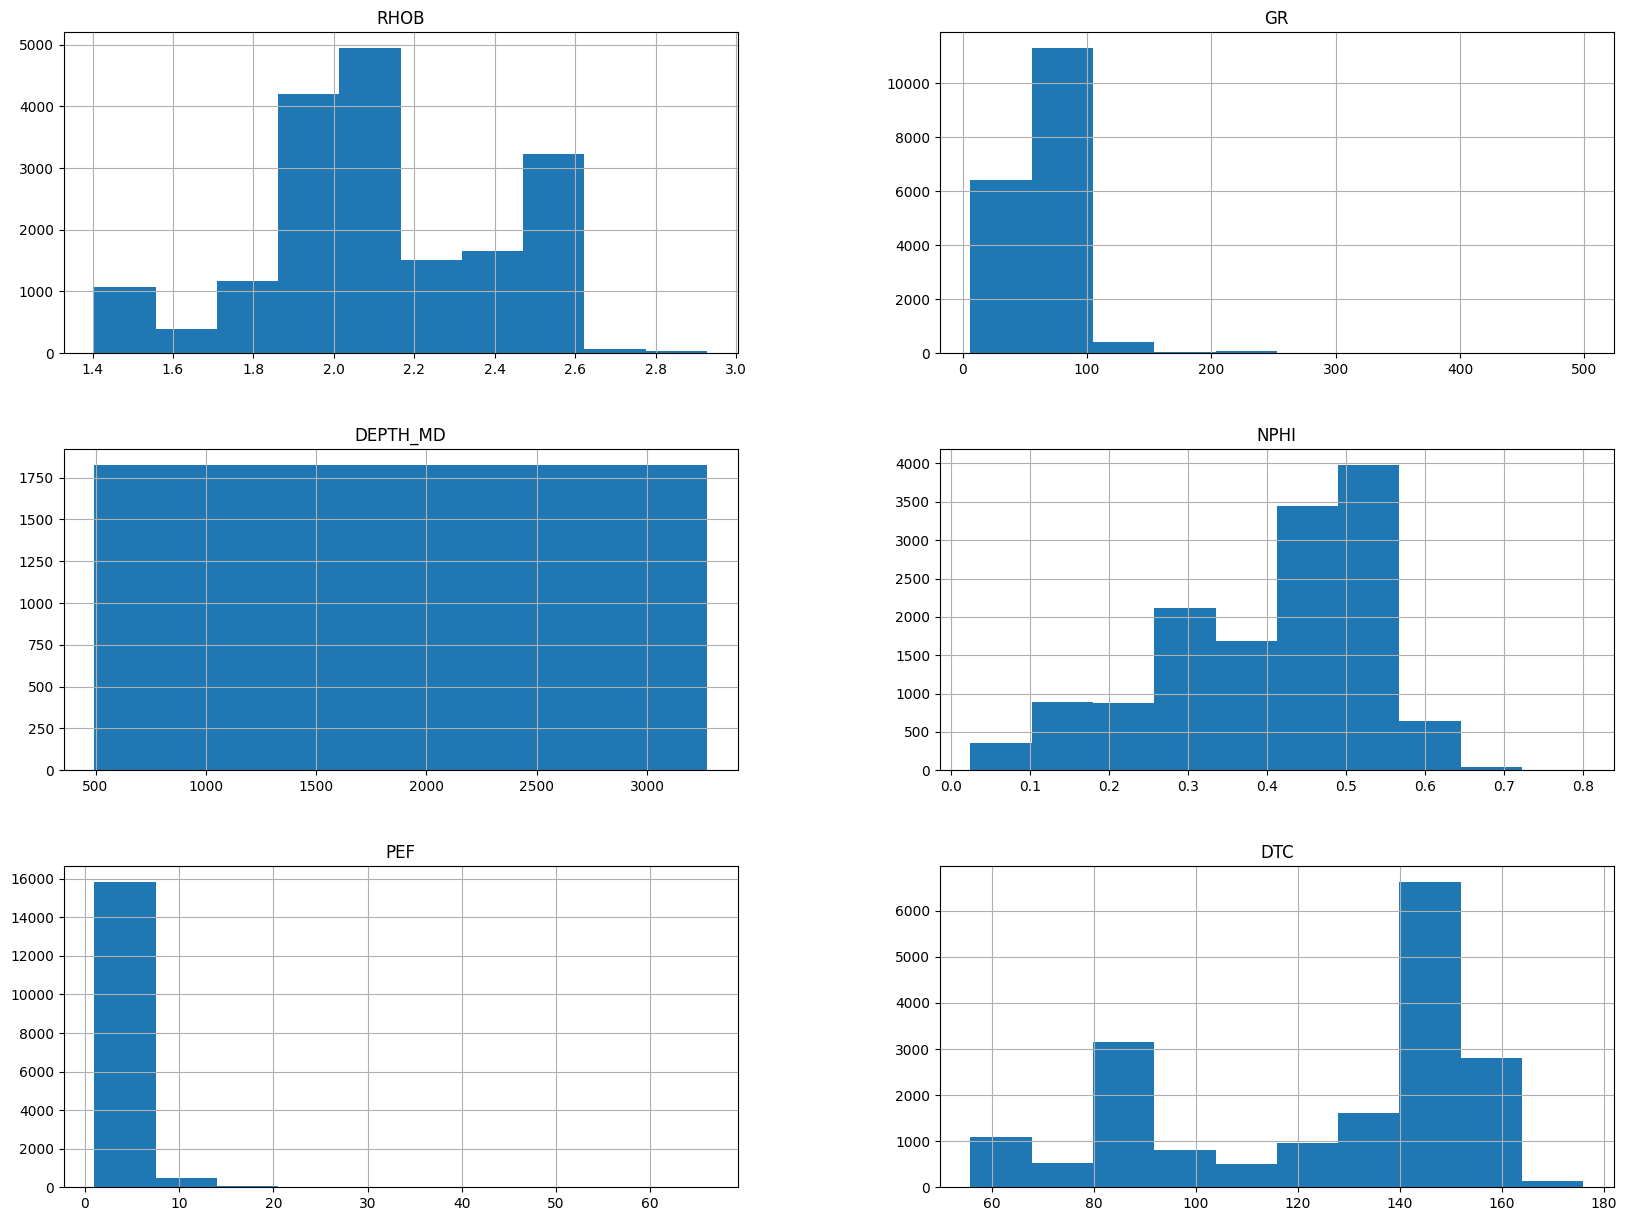

In [7]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [8]:
data.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [9]:
data['NPHI']=data['NPHI'].fillna(data['NPHI'].median())

In [10]:
data['NPHI'].isna().sum()

0

In [11]:
data['PEF']=data['PEF'].fillna(data['PEF'].median())

In [12]:
data['PEF'].isna().sum()

0

In [13]:
data['DTC']=data['DTC'].fillna(data['DTC'].median())

In [14]:
data['DTC'].isna().sum()

0

In [15]:
data.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


In [16]:
#data scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [17]:
columns_scale=['RHOB','NPHI']
data[columns_scale]=sc.fit_transform(data[columns_scale])

In [18]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,80.200851,494.528,0.285088,20.915468,161.131180
1,-0.741163,79.262886,494.680,0.285088,19.383013,160.603470
2,-0.718560,74.821999,494.832,0.285088,22.591518,160.173615
3,-0.734045,72.878922,494.984,0.285088,32.191910,160.149429
4,-0.773944,71.729141,495.136,0.285088,38.495632,160.128342


In [19]:
x=data[['RHOB','NPHI']]

In [20]:
from sklearn.cluster import KMeans

In [21]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate with in cluster sum of squares
  wcss.append(css)

Text(0, 0.5, 'wcss')

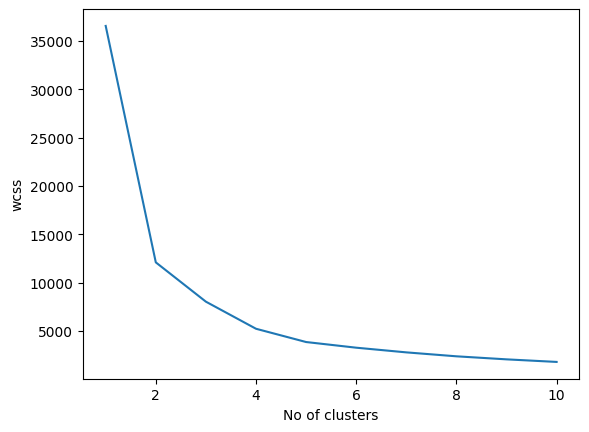

In [22]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')


In [23]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [24]:
cluster_labels=km.predict(x)

In [25]:
data['Cluster_Labels']=cluster_labels

In [26]:
cluster_indices=np.where(cluster_labels==0)[0]

In [27]:
cluster_indices

array([ 5372,  5373,  5374, ..., 18210, 18211, 18212])

In [28]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster_Labels
0,-0.759999,80.200851,494.528,0.285088,20.915468,161.131180,1
1,-0.741163,79.262886,494.680,0.285088,19.383013,160.603470,1
2,-0.718560,74.821999,494.832,0.285088,22.591518,160.173615,1
3,-0.734045,72.878922,494.984,0.285088,32.191910,160.149429,1
4,-0.773944,71.729141,495.136,0.285088,38.495632,160.128342,1


In [29]:
color=colors=['r','g','b','c','m']

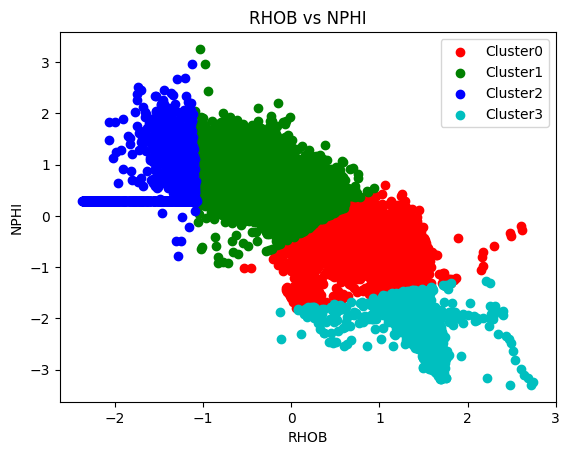

In [30]:
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI'],c=colors[i],label=f'Cluster{i}')
plt.xlabel('RHOB')
plt.ylabel("NPHI")
plt.title('RHOB vs NPHI')
plt.legend()
plt.show()

In [31]:
#prediction
def predict_cluster(rhob,nphi):
  new_data=[[RHOB,NPHI]]
  cluster=km.predict(new_data)
  return cluster[0]

In [32]:
#new data
RHOB=-0.75
NPHI=0.28
c=predict_cluster(RHOB,NPHI)
print(f'This belongs to :{c}')

This belongs to :1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [33]:
#agglomerative hc

In [34]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


In [35]:
mergings=linkage(x,method='ward')


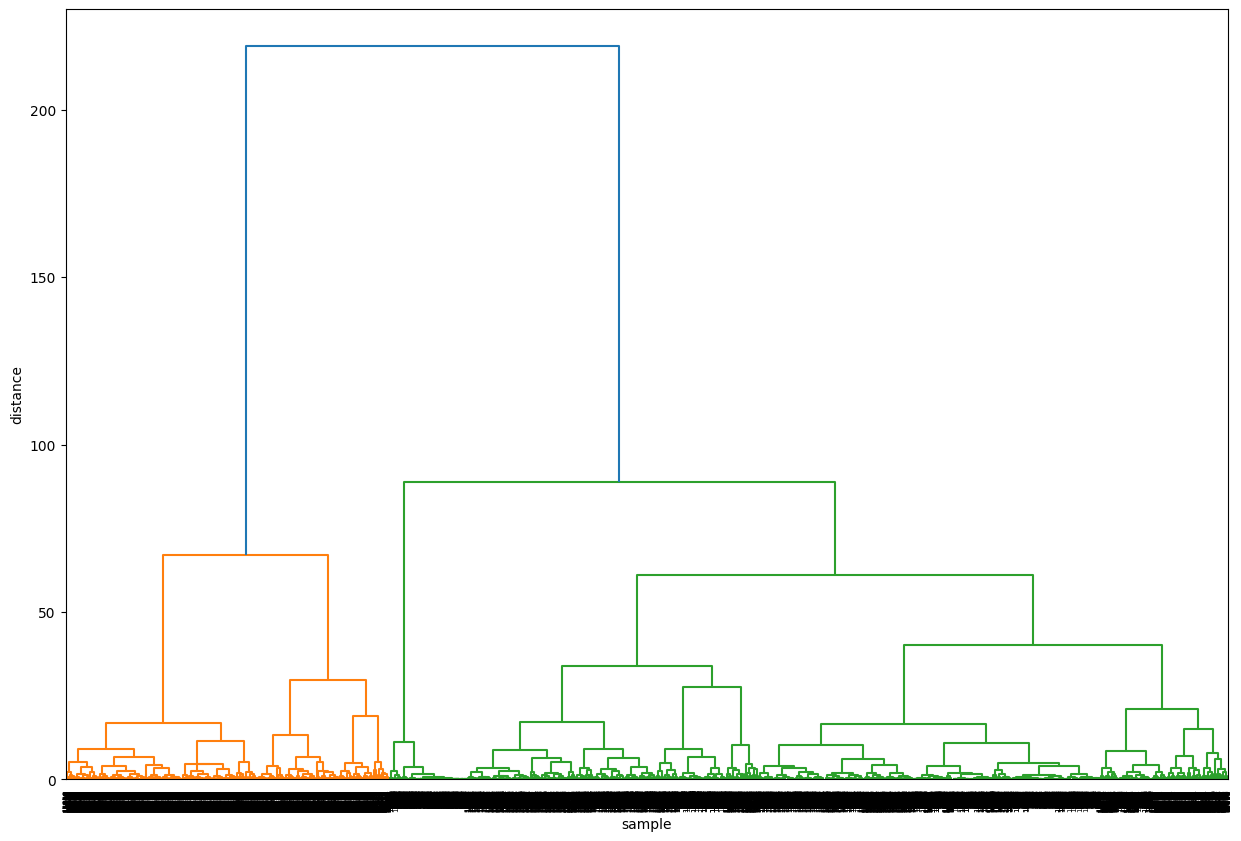

In [36]:
plt.figure(figsize=(15,10))
dendrogram(mergings)
plt.xlabel('sample')
plt.ylabel('distance')
plt.show()


In [37]:
cluster_labels = fcluster(mergings, t=150, criterion='distance')


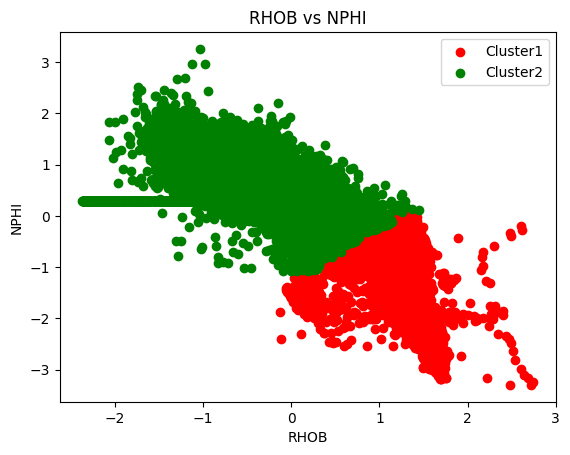

In [39]:
colors=['r','g','b','c']
for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI'],c=colors[i-1],label=f'Cluster{i}')
plt.xlabel('RHOB')
plt.ylabel("NPHI")
plt.title('RHOB vs NPHI')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.6169823462077547


customer data

In [50]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [51]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [53]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [54]:
data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [73]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [66]:
x=data[['Fresh','Grocery']]

In [46]:
#now we have to scale the data

In [85]:
cols_to_scale = ['Fresh','Grocery']
data_to_scale = data[cols_to_scale]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale, index=data.index)
data[cols_to_scale] = scaled_df
print(data)

     Channel  Region     Fresh      Milk   Grocery  Frozen  Detergents_Paper  \
0          2       3  0.052933  0.523568 -0.041115     214              2674   
1          2       3 -0.391302  0.544458  0.170318    1762              3293   
2          2       3 -0.447029  0.408538 -0.028157    2405              3516   
3          1       3  0.100111 -0.624020 -0.392977    6404               507   
4          2       3  0.840239 -0.052396 -0.079356    3915              1777   
..       ...     ...       ...       ...       ...     ...               ...   
435        1       3  1.401312  0.848446  0.850760   13135               182   
436        1       3  2.155293 -0.592142 -0.757165    4510                93   
437        2       3  0.200326  1.314671  2.348386     437             14841   
438        1       3 -0.135384 -0.517536 -0.602514    1038               168   
439        1       3 -0.729307 -0.555924 -0.573227      65               477   

     Delicassen  Cluster_labels  
0    

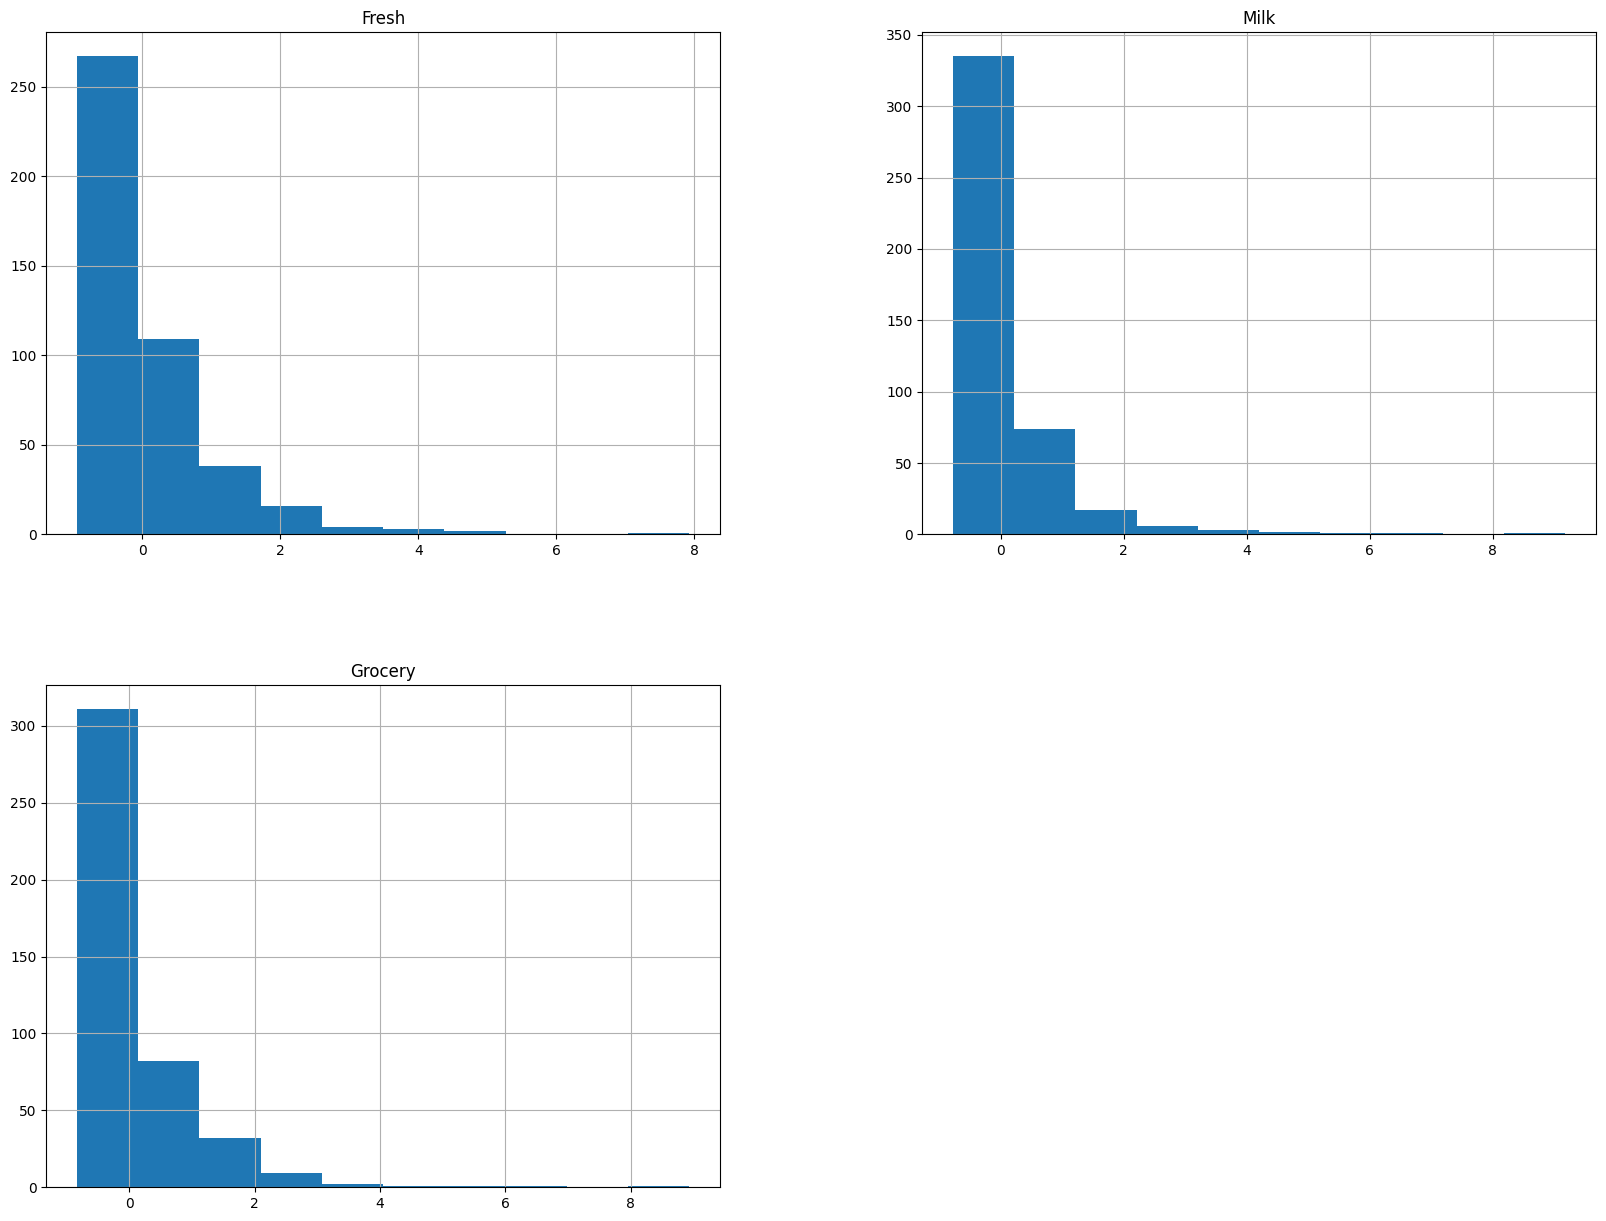

In [86]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [87]:
data['Fresh']=data['Fresh'].fillna(data['Fresh'].median())

In [88]:
data['Fresh'].isna().sum()

0

In [89]:
data['Grocery']=data['Grocery'].fillna(data['Grocery'].median())
data['Grocery'].isna().sum()

0

In [90]:
#Clustering(KMeans)

In [91]:
from sklearn.cluster import KMeans

In [92]:
wcss=[]                     #WCSS=Within-Cluster Sum of Square
for i in range(1,15):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_  #will calculate with in cluster sum of square
  wcss.append(css)

In [93]:
wcss

[879.9999999999998,
 612.6404684447484,
 377.9305612347993,
 280.9495432125413,
 203.65508954529312,
 166.55599422204247,
 135.70123312239772,
 117.19888582083253,
 100.72881914654484,
 89.61878482645209,
 78.76374344814784,
 71.55886148915907,
 63.94372505830907,
 56.91919280296767]

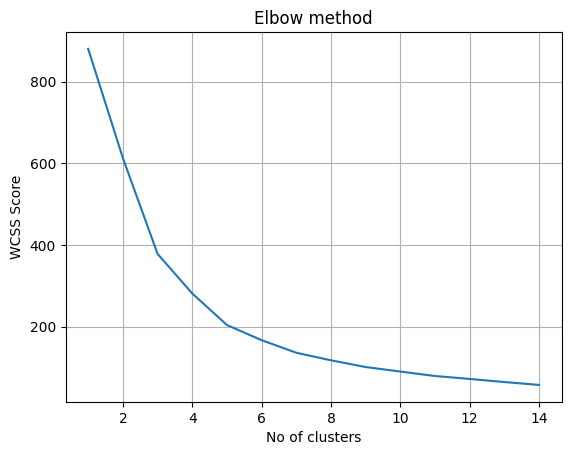

In [94]:
plt.plot(range(1,15),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS Score')
plt.title('Elbow method')
plt.grid()
plt.show()


In [95]:
km=KMeans(n_clusters=5,n_init=10)
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [96]:
cluster_labels=km.predict(x)

In [97]:
pd.Series(cluster_labels).value_counts()

,count
0,236
2,108
3,69
4,23
1,4


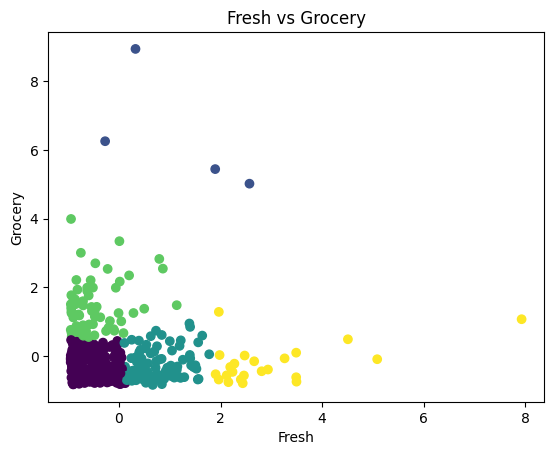

In [98]:
plt.scatter(x['Fresh'],x                                    #Plotting the datas belonging to clusters
       ['Grocery'],c=cluster_labels)
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.title('Fresh vs Grocery')
plt.show()

In [99]:
#to know which datas belong to which clusters in the above graph
data['Cluster_labels']=cluster_labels

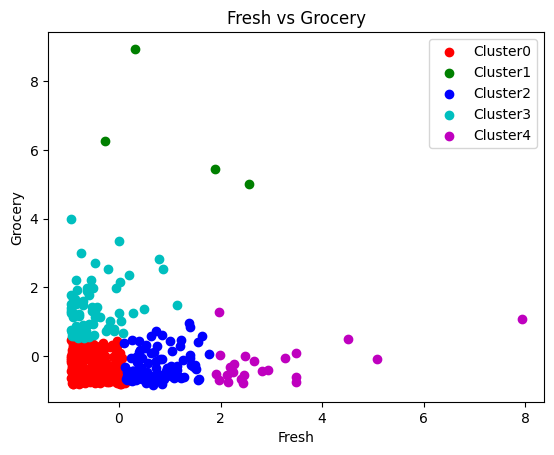

In [100]:
colors=['r','g','b','c','m']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],cluster_data['Grocery'],c=colors[i],label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel("Grocery")
plt.title('Fresh vs Grocery')
plt.legend()
plt.show()

In [107]:
inertia=km.inertia_
print("Inertia = ",inertia)

Inertia =  203.6761881016909


In [101]:
#agglomerative hc

In [102]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [103]:
mergings=linkage(x,method='ward')

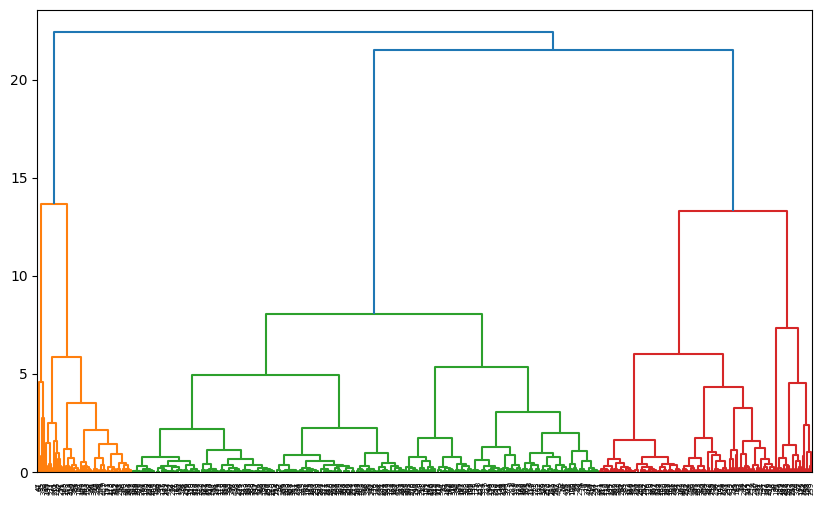

In [104]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [105]:
cluster_labels=fcluster(mergings,100,criterion='distance')

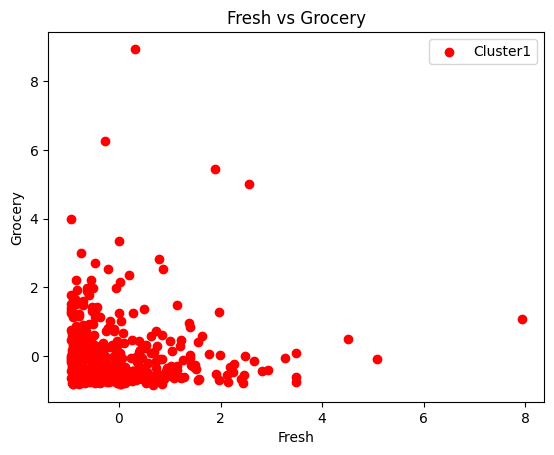

In [106]:
colors=['r','g','b','c']
for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],cluster_data['Grocery'],c=colors[i-1],label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel("Grocery")
plt.title('Fresh vs Grocery')
plt.legend()
plt.show()